In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
pd.set_option('display.min_rows', 20)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'fd5ffaa27511bf337ff3416ce8168e3a'

# 1. Create Fred Object

In [9]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data

In [64]:
sp_search = fred.search('S&P', order_by='popularity')

In [65]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-27,2023-09-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 09:06:08-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-09-27,2023-09-27,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-09-27,2023-09-27,S&P 500,2013-09-30,2023-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-27 19:11:01-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-09-27,2023-09-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 09:06:12-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-09-27,2023-09-27,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSHRCPCHA156NRUG,CSHRCPCHA156NRUG,2023-09-27,2023-09-27,Share of Residual Trade and GDP Statistical Di...,1950-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:35:27-06:00,3,Source ID: csh_r When using these data in you...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-09-27,2023-09-27,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01ILA156NWDB,DDEM01ILA156NWDB,2023-09-27,2023-09-27,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:28:54-05:00,3,Total value of shares traded during the period...


# Pull raw data and plot

In [18]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

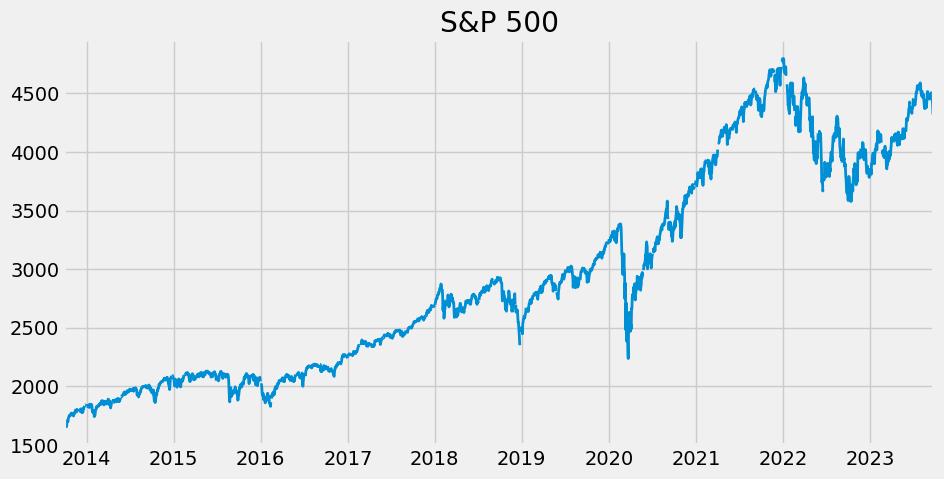

In [24]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [110]:
unemp_df = fred.search('unemployment rate', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['id'].str.len() == 4]

In [113]:
unemp_df.shape

(52, 15)

In [114]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)

In [127]:
unemp_states = pd.concat(all_results, axis=1)

In [128]:
unemp_states

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,ALUR,COUR,PAUR,ILUR,MAUR,VAUR,NMUR,NCUR,NJUR,TNUR,MNUR,WIUR,MDUR,KYUR,AZUR,ORUR,ARUR,GAUR,INUR,SCUR,MOUR,IAUR,NVUR,WAUR,UTUR,WVUR,OKUR,HIUR,DCUR,KSUR,MSUR,LAUR,NEUR,NDUR,PRUR,AKUR,MEUR,CTUR,MTUR,SDUR,DEUR,WYUR,RIUR,IDUR,NHUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,5.8,8.0,6.6,10.5,6.1,8.6,6.4,10.3,6.0,6.0,5.8,6.4,5.6,10.2,9.5,7.3,8.4,6.6,7.4,5.9,4.3,9.2,8.5,5.8,7.5,5.8,9.8,8.7,4.2,6.7,6.3,3.3,3.4,19.6,7.1,8.7,9.8,5.8,3.3,8.0,4.1,7.8,5.6,6.5,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,5.7,8.1,6.6,10.5,6.1,8.7,6.4,10.3,6.0,6.0,5.8,6.4,5.6,10.2,9.5,7.3,8.4,6.6,7.4,5.9,4.3,9.2,8.5,5.9,7.5,5.8,9.8,8.7,4.2,6.7,6.3,3.3,3.4,19.5,7.1,8.7,9.8,5.8,3.3,8.0,4.1,7.8,5.6,6.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,5.7,8.1,6.6,10.5,6.1,8.7,6.4,10.3,6.0,5.9,5.7,6.4,5.6,10.1,9.4,7.3,8.4,6.5,7.3,5.9,4.3,9.2,8.4,5.8,7.5,5.8,9.8,8.6,4.2,6.6,6.3,3.3,3.4,19.3,7.0,8.6,9.8,5.8,3.2,8.0,4.1,7.7,5.6,6.5,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,5.6,8.1,6.6,10.3,6.0,8.6,6.3,10.3,6.0,5.8,5.6,6.4,5.6,10.0,9.2,7.2,8.3,6.3,7.2,6.0,4.2,9.0,8.5,5.8,7.5,5.8,9.7,8.5,4.2,6.4,6.4,3.2,3.5,19.0,6.9,8.6,9.6,5.8,3.1,8.1,4.0,7.7,5.6,6.5,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,5.6,8.1,6.6,10.1,5.9,8.6,6.1,10.3,5.9,5.7,5.5,6.5,5.5,9.8,9.1,7.1,8.1,6.0,7.0,6.0,4.1,8.9,8.5,5.7,7.4,5.7,9.4,8.4,4.2,6.3,6.5,3.1,3.6,18.9,6.9,8.5,9.4,5.8,3.1,8.3,3.9,7.7,5.6,6.5,8.5
1976-06-01,9.0,5.9,10.2,9.2,7.6,9.4,6.5,5.6,8.0,6.6,9.8,5.8,8.6,6.0,10.3,5.9,5.6,5.4,6.5,5.5,9.7,9.0,6.9,8.0,5.8,6.9,6.1,4.0,8.7,8.6,5.6,7.4,5.6,9.2,8.3,4.1,6.2,6.7,3.1,3.7,18.9,7.1,8.4,9.3,5.8,3.1,8.6,3.8,7.7,5.6,6.5,8.4
1976-07-01,9.0,5.9,10.2,9.1,7.5,9.2,6.6,5.8,7.9,6.6,9.6,5.8,8.6,5.9,10.4,6.0,5.6,5.3,6.6,5.4,9.7,9.1,6.8,8.0,5.7,6.8,6.2,4.0,8.6,8.7,5.5,7.2,5.6,9.0,8.4,4.1,6.2,6.8,3.0,3.8,19.1,7.3,8.4,9.1,5.9,3.2,8.8,3.7,7.8,5.6,6.4,8.3
1976-08-01,9.1,5.8,10.2,9.1,7.5,9.1,6.7,5.9,7.9,6.6,9.4,5.8,8.6,5.9,10.4,6.1,5.7,5.3,6.6,5.4,9.6,9.2,6.7,8.0,5.7,6.8,6.3,3.9,8.6,8.9,5.4,7.1,5.5,8.9,8.5,4.1,6.3,6.8,3.1,3.9,19.4,7.6,8.5,9.0,5.9,3.3,8.9,3.7,8.0,5.6,6.4,8.2
1976-09-01,9.2,5.7,10.2,9.1,7.5,9.0,6.8,6.1,7.9,6.6,9.2,5.8,8.7,6.0,10.4,6.1,5.7,5.4,6.7,5.3,9.6,9.2,6.6,8.0,5.7,6.8,6.4,3.9,8.6,9.0,5.4,6.9,5.4,8.8,8.7,4.1,6.4,6.9,3.1,4.0,19.8,8.0,8.6,8.8,5.9,3.4,9.0,3.7,8.2,5.6,6.3,8.0
1976-10-01,9.3,5.7,10.2,9.1,7.5,9.0,6.9,6.3,7.9,6.5,9.1,5.7,8.9,6.2,10.5,6.3,5.8,5.4,6.7,5.2,9.5,9.3,6.6,8.1,5.8,6.8,6.5,4.0,8.6,9.1,5.4,6.8,5.4,8.7,8.8,4.1,6.6,6.9,3.1,4.1,19.9,8.3,8.8,8.7,6.0,3.5,9.1,3.7,8.4,5.7,6.3,7.9


In [120]:
px.line(unemp_states)